# SVM with TFIDF vectors

In [4]:
!pip install pandas scikit-learn

In [18]:
# imports here

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [19]:
df = pd.read_csv("./data/training.csv")
df.head()

,id,sentence,label
0,0,Those 2 drinks are part of the HK culture and ...,negative
1,1,I was told by the repair company that was doin...,negative
2,2,It is there to give them a good time .,neutral
3,3,Like leafing through an album of photos accomp...,negative
4,4,Johnny was a talker and liked to have fun.,positive


In [20]:
sentences = df['sentence'].astype(str)
labels = df['label']

In [21]:
labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(labels)
labels

array([0, 0, 1, ..., 1, 1, 1], shape=(102097,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2,random_state=42)

In [23]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
sentiment_cls = SVC(kernel='rbf')
sentiment_cls.fit(X_train_vec, y_train)

SVC()

In [25]:
y_pred = sentiment_cls.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.683643486777669


In [26]:
df_test = pd.read_csv('./data/test.csv')
df_test.head()

,id,sentence
0,0,Found Thai Spoon on the Vegan Pittsburgh website.
1,1,Our bill came out to around $27 and we ate lik...
2,2,State Farm broke down the costs for me of the ...
3,3,The only con for this resto is the wait to get...
4,4,We could hear the people above us stomping aro...


In [27]:
final_test_sentences = df_test['sentence']
final_test_vect = vectorizer.transform(final_test_sentences)

In [28]:
final_y_pred = sentiment_cls.predict(final_test_vect)

In [29]:
final_submission = labelEncoder.inverse_transform(final_y_pred)

In [30]:
sub_df = pd.DataFrame({
    'id': range(len(final_submission)),
    'label': final_submission
})

sub_df.head()

,id,label
0,0,neutral
1,1,neutral
2,2,neutral
3,3,negative
4,4,neutral


In [31]:
sub_df.to_csv('submission_svm_rbf.csv', index=False)

# Pretrained Distilbert finetuned on SST2

In [33]:
!pip install datasets

  Using cached datasets-3.6.0-py3-none-any.whl.metadata (19 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached xxhash-3.5.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
  Using cached aiohappyeyeballs-2.6.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached multidict-6.4.3-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.3 kB)
  Using cached propcache-0.3.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (10 kB)
Using cached dill-0.3.8-py3-none-any.whl (116 kB)
Using cached multiprocess-0.70.16-py310-none-any.whl (134 kB)
Using cached async_timeout-5.0.1-py3-none-any.whl (6.2 kB)
Using cached multidict-6.4.3-cp310-cp310-macosx_11_0_arm64.whl (37 kB)
Using cached aiohappyeyeballs-2.6.1-py3-no

In [8]:
from datasets import load_dataset
from transformers import pipeline
from transformers.pipelines.pt_utils import KeyDataset
from tqdm.auto import tqdm

/Users/kaushikk/Documents/All/University/ETH Zurich - Study/Y1S2/CI-Lab/eth_cil_sentimentAI/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


In [10]:
# Now that you have the pipeline for sentiment analysis ready, let us perform inference on the test set that we have
import csv
dataset = load_dataset("csv", data_files={"train": "./data/training.csv", "test": "./data/test.csv"})

# Open file in write mode initially to write header
with open('submission.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'label'])  # adjust column names as needed

inp_sentences = [inp['sentence'] for inp in dataset['test']]
inp_ids = [inp['id'] for inp in dataset['test']]
outputs = pipe(inp_sentences) # perform inference
print(len(inp_sentences))
print(len(inp_ids))
print(len(outputs))

# Write output to submission
for idx in range(len(outputs)):
    with open('submission_bert_sst2.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([inp_ids[idx], outputs[idx]['label'].lower()])


KeyboardInterrupt: 

# Logistic Regression with all-MiniLM-L6-v2 Model Embeddings

In [48]:
!pip install sentence_transformers

  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (8.9 kB)
Using cached sentence_transformers-4.1.0-py3-none-any.whl (345 kB)
Using cached pillow-11.2.1-cp310-cp310-macosx_11_0_arm64.whl (3.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [sentence_transformers]ence_transformers]


In [9]:
from sentence_transformers import SentenceTransformer

In [10]:
model_name = 'all-MiniLM-L6-v2'
print(f'Loading model: {model_name}')

model_embd = SentenceTransformer(model_name)

train_input_sentences = [s['sentence'] for s in dataset['train']]

inp_sentence_embeddings = model_embd.encode(train_input_sentences)

Loading model: all-MiniLM-L6-v2


In [11]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier, C: Inverse of regularization strength , max_iter: Maximum number of training iterations
label_map = {'negative': -1, "neutral": 0, "positive": 1}
train_encoded_labels = [label_map[s['label']] for s in dataset['train']]
model = LogisticRegression(C=1.0, max_iter=100)
model.fit(inp_sentence_embeddings, train_encoded_labels)

LogisticRegression()

In [12]:
y_train_pred = model.predict(inp_sentence_embeddings)

out_sentences = [s['sentence'] for s in dataset['test']]
out_sentences_embeddings = model_embd.encode(out_sentences)

y_test_pred = model.predict(out_sentences_embeddings)

In [13]:
reverse_label_map = {-1: "negative", 0: "neutral", 1: "positive"}
y_test_pred = [reverse_label_map[pred] for pred in y_test_pred]

In [14]:
from sklearn.metrics import mean_absolute_error
# Score on Training Set
mae_train = mean_absolute_error(train_encoded_labels, y_train_pred)
L_score_train = 0.5 * (2 - mae_train)
print(L_score_train)

0.8043233395692332


In [15]:
import csv
inp_ids = [inp['id'] for inp in dataset['test']]
# Open file in write mode initially to write header
with open('submission_logreg_embd.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['id', 'label'])  # adjust column names as needed

# Write output to submission
for idx in range(len(y_test_pred)):
    with open('submission_logreg_embd.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([inp_ids[idx], y_test_pred[idx]])

# Plotting Test Accuracies

In [12]:
!pip install matplot

  Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 41.8 MB/s eta 0:00:0000:01
Using cached contourpy-1.3.2-cp310-cp310-macosx_11_0_arm64.whl (253 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━

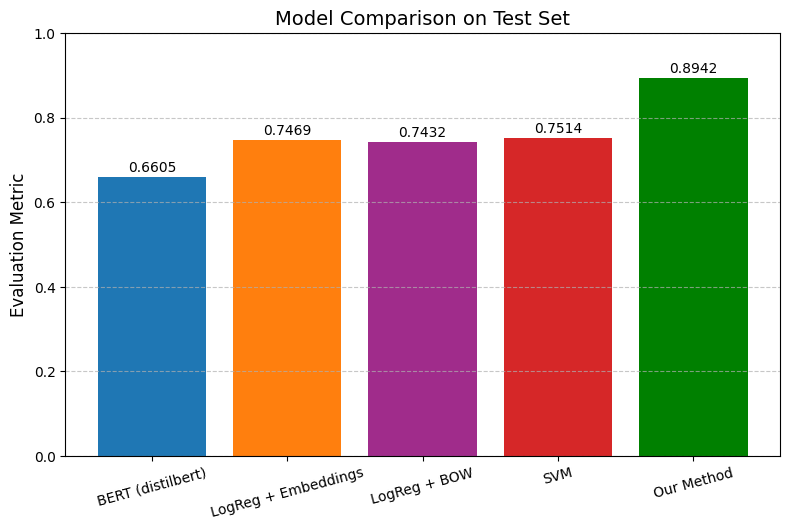

In [32]:
import matplotlib.pyplot as plt

# Model names and their corresponding scores (from the 4 green/complete ones)
models = [
    "BERT (distilbert)",
    "LogReg + Embeddings",
    "LogReg + BOW",
    "SVM",
    "Our Method"
]

scores = [
    0.66048,
    0.74691,
    0.74322,
    0.75142,
    0.89420
]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(models, scores, color=["#1f77b4", "#ff7f0e", "#a02c8b", "#d62728", "green"])
plt.ylim(0.0, 1.0)

plt.title("Model Comparison on Test Set", fontsize=14)
plt.ylabel("Evaluation Metric", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars
for bar, score in zip(bars, scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{score:.4f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.xticks(rotation=15)
plt.show()
